In [1]:
import warnings
warnings.filterwarnings('ignore')

import logging;logging.basicConfig(level=logging.INFO);
import numpy as np;
import matplotlib.pyplot as plt; 
import logictensornetworks_wrapper as ltnw;
import logictensornetworks as ltn

In [2]:
nr_samples=500
max_epochs=10000
track_sat_levels=1000 #how often we query the knowledgebase sat level in training

Sample random data from $[0,1]^2$

In [3]:
data=np.random.uniform([0,0],[1.,1.],(nr_samples,2)).astype(np.float32)

In [4]:
data_A=data[np.where(np.sum(np.square(data-[.5,.5]),axis=1)<.09)]
data_B=data[np.where(np.sum(np.square(data-[.5,.5]),axis=1)>=.09)]

In [5]:
data_A.shape

(140, 2)

### Load mnist data

In [6]:
import mnist_input
import numpy as np

data_set_dir = "mnist_data/"

TRAIN_IMAGES = 'train-images-idx3-ubyte.gz'
TRAIN_LABELS = 'train-labels-idx1-ubyte.gz'

In [7]:
local_file   = mnist_input.maybe_download(TRAIN_IMAGES, data_set_dir)
train_images = mnist_input.extract_images(local_file)

Extracting mnist_data/train-images-idx3-ubyte.gz


In [8]:
train_images.squeeze().shape

(60000, 28, 28)

In [9]:
local_file = mnist_input.maybe_download(TRAIN_LABELS, data_set_dir)
train_labels = mnist_input.extract_labels(local_file, one_hot=False)

Extracting mnist_data/train-labels-idx1-ubyte.gz


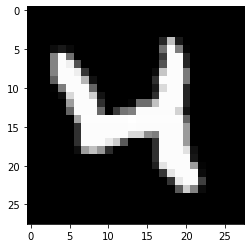

In [10]:
from matplotlib import pyplot as plt

plt.gray()
plt.imshow(train_images[20].squeeze(), interpolation='nearest')
plt.show()

In [11]:
train_labels[20]

4

### Create correct data for training

In [12]:
data_1 = train_images[np.where(train_labels == 1)].squeeze()
data_2 = train_images[np.where(train_labels == 2)].squeeze()
data_3 = train_images[np.where(train_labels == 3)].squeeze()

In [13]:
data_1.shape, data_2.shape, data_3.shape

((6742, 28, 28), (5958, 28, 28), (6131, 28, 28))

In [14]:
# flatten 
data_1 = data_1.reshape(data_1.shape[0],784)[0:1000].astype(np.float32)
data_2 = data_2.reshape(data_2.shape[0],784)[0:1000].astype(np.float32)
data_3 = data_3.reshape(data_3.shape[0],784)[0:1000].astype(np.float32)

# data_1 = data_1.reshape(data_1.shape[0],784).astype(np.float32)
# data_2 = data_2.reshape(data_2.shape[0],784).astype(np.float32)
# data_3 = data_3.reshape(data_3.shape[0],784).astype(np.float32)

In [15]:
data_1.shape

(1000, 784)

In [16]:
ltn.LAYERS = 10

In [17]:
#ltnw.variable("?data",data);
ltnw.variable("?data_1",data_1)
ltnw.variable("?data_2",data_2)
ltnw.variable("?data_3",data_3)

<tf.Tensor 'var_data_3:0' shape=(1000, 784) dtype=float32>

In [18]:
ltnw.predicate("num1", 784)
ltnw.predicate("num2", 784)
ltnw.predicate("num3", 784)
#ltnw.predicate("num2",2);

<function logictensornetworks.predicate.<locals>.pred(*args)>

In [19]:
ltnw.axiom("forall ?data_1: num1(?data_1)")
ltnw.axiom("forall ?data_1: ~num2(?data_1)")
ltnw.axiom("forall ?data_1: ~num3(?data_1)")

ltnw.axiom("forall ?data_2: num2(?data_2)")
ltnw.axiom("forall ?data_2: ~num1(?data_2)")
ltnw.axiom("forall ?data_2: ~num3(?data_2)")

ltnw.axiom("forall ?data_3: num3(?data_3)")
ltnw.axiom("forall ?data_3: ~num1(?data_3)")
ltnw.axiom("forall ?data_3: ~num2(?data_3)")


print("\n".join(sorted(ltnw.AXIOMS.keys())))

forall ?data_1: num1(?data_1)
forall ?data_1: ~num2(?data_1)
forall ?data_1: ~num3(?data_1)
forall ?data_2: num2(?data_2)
forall ?data_2: ~num1(?data_2)
forall ?data_2: ~num3(?data_2)
forall ?data_3: num3(?data_3)
forall ?data_3: ~num1(?data_3)
forall ?data_3: ~num2(?data_3)


In [20]:
ltnw.initialize_knowledgebase(initial_sat_level_threshold=.1)
sat_level=ltnw.train(track_sat_levels=100,sat_level_epsilon=.99,max_epochs=1000)

INFO:logictensornetworks_wrapper:Initializing knowledgebase
INFO:logictensornetworks_wrapper:Initializing Tensorflow session



INFO:logictensornetworks_wrapper:Initializing optimizer

INFO:logictensornetworks_wrapper:Assembling feed dict
INFO:logictensornetworks_wrapper:INITIALIZE 0 sat level -----> 0.04400226
INFO:logictensornetworks_wrapper:INITIALIZE 10 sat level -----> 0.023078538
INFO:logictensornetworks_wrapper:INITIALIZE 20 sat level -----> 0.05662872
INFO:logictensornetworks_wrapper:INITIALIZED with sat level = 0.11479048
INFO:logictensornetworks_wrapper:TRAINING 0 sat level -----> 0.11479048
INFO:logictensornetworks_wrapper:TRAINING 100 sat level -----> 0.2039888
INFO:logictensornetworks_wrapper:TRAINING 200 sat level -----> 0.28886998
INFO:logictensornetworks_wrapper:TRAINING 300 sat level -----> 0.36011994
INFO:logictensornetworks_wrapper:TRAINING 400 sat level -----> 0.4315815
INFO:logictensornetworks_wrapper:TRAINING 500 sat level -----> 0.4930255
INFO:logictensornetworks

In [20]:
ltnw.constant("foto1_1", data_1[0])

<tf.Tensor 'ltn_constant_foto1_1:0' shape=(784,) dtype=float32>

In [22]:
print("foto1_1 is in num1: %s" % ltnw.ask("num1(foto1_1)"))
print("foto1_1 is in num2: %s" % ltnw.ask("num2(foto1_1)"))
print("foto1_1 is in num3: %s" % ltnw.ask("num3(foto1_1)"))

foto1_1 is in num1: [0.41534448]
foto1_1 is in num2: [0.3867157]
foto1_1 is in num3: [0.3845043]
